In [1]:
import pandas as pd
from jiwer import wer
import matplotlib.pyplot as plt 
from src.data_plotting import histogram_plotting, boxplot_plotting, kde_plotting, plot_model_comparison
from src.statistics import advanced_statistics, word_frequency
import nltk
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Whisper vs Wav2wec evaluation

In [3]:
df_wav2wec = pd.read_parquet('./data/parquets/wav2wec_wer.parquet.gzip')

In [4]:
df_whisper_large = pd.read_parquet('./data/parquets/Whisper_SNR_WER.gzip')

#### Wav2wec

In [5]:
wav2wec_stats = advanced_statistics(df_wav2wec,'Wav2wec_SNR','sentences',2)

In [6]:
wav2wec_stats

,WER_SNR__100,WER_SNR__50,WER_SNR__25,WER_SNR__10,WER_SNR__5,WER_SNR__0.1,WER_SNR__-1
count,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00
mean,27.56,27.68,29.24,42.25,57.22,74.76,77.69
std,24.62,24.50,25.82,29.31,32.62,33.88,33.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,13.33,13.33,14.29,24.00,33.33,50.00,54.23
50%,23.33,23.33,25.00,38.46,55.56,83.33,89.04
75%,36.11,36.36,37.50,55.20,77.78,100.00,100.00
max,460.00,480.00,480.00,580.00,520.00,380.00,380.00
mean without 2%,25.48,25.65,27.06,40.36,54.97,74.06,77.22
Perfect outputs,179.00,179.00,158.00,90.00,59.00,38.00,33.00


#### Whisper large v3

In [7]:
whisper_stats = advanced_statistics(df_whisper_large, 'WER_audio_SNR_','ref_orig',2)

In [8]:
whisper_stats

,WER_SNR_100_path,WER_SNR_50_path,WER_SNR_25_path,WER_SNR_10_path,WER_SNR_5_path,WER_SNR_0.1_path,WER_SNR_-1_path,WER_SNR_-3_path,WER_SNR_-10_path
count,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00
mean,23.65,23.69,25.59,29.79,33.96,45.02,50.86,57.75,100.70
std,26.18,26.02,25.22,26.03,27.34,67.95,128.50,101.46,199.06
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.09,9.09,11.11,14.29,16.67,23.08,25.00,27.87,43.59
50%,18.18,18.63,20.94,25.00,30.00,37.93,40.00,47.83,92.31
75%,30.43,30.56,33.33,38.75,43.33,56.25,61.29,75.00,100.00
max,520.00,520.00,520.00,520.00,520.00,2350.00,5525.00,3325.00,3677.78
mean without 2%,22.63,22.73,24.64,28.61,32.34,40.84,44.27,51.35,79.45
Perfect outputs,214.00,215.00,193.00,133.00,101.00,70.00,62.00,60.00,23.00


Normalizing dfs for both models, analyzing WER -1 and lower is not necessary, because values there are way lower than acceptable 

In [9]:
# Renaming columns
for col in whisper_stats.columns:
    if col.endswith('_path'):
        # Removing the '_path' suffix
        new_name = col[:-5]
        whisper_stats.rename(columns={col: new_name}, inplace=True)

# Deleting low SNR columns
whisper_stats = whisper_stats.drop(columns=['WER_SNR_-3','WER_SNR_-10'])

### Comparison

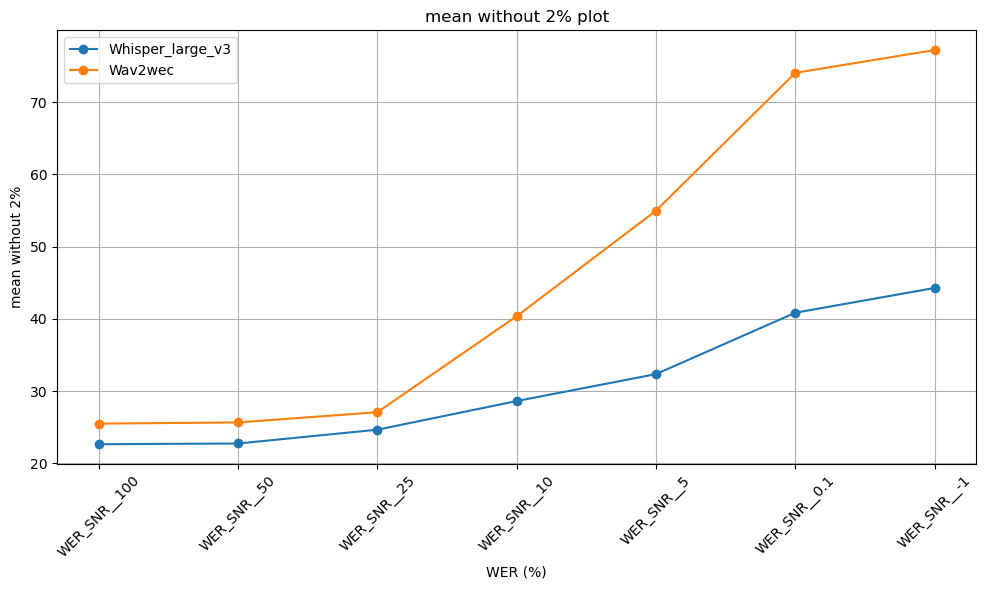

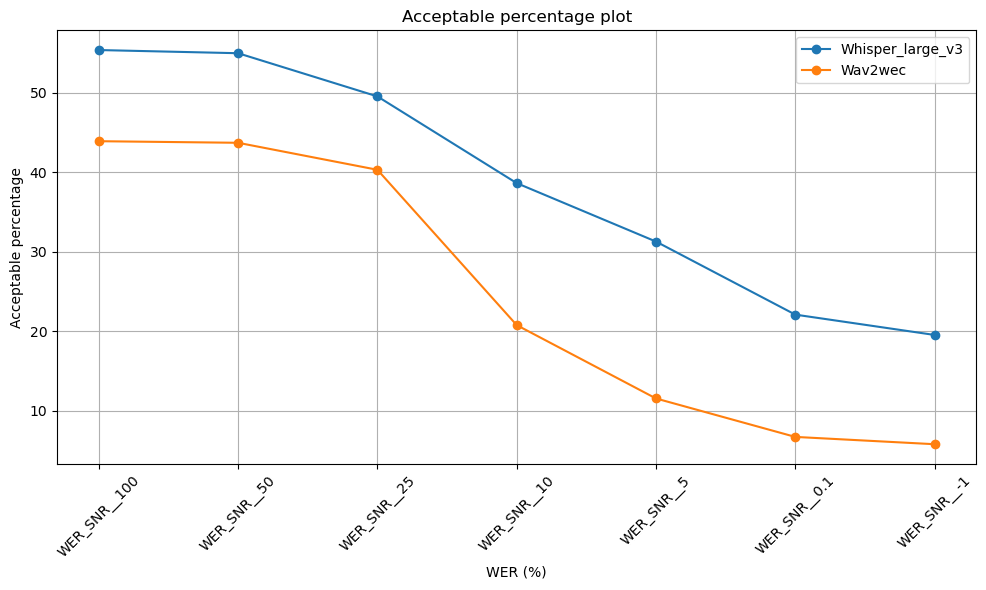

In [10]:
plot_model_comparison(whisper_stats,wav2wec_stats,'mean without 2%','Whisper_large_v3', 'Wav2wec')
plot_model_comparison(whisper_stats,wav2wec_stats,'Acceptable percentage','Whisper_large_v3', 'Wav2wec')

## Not normalized Whisper SNR (just a work code for deleted code)

In [11]:
df_not_norm = pd.read_parquet('full_testing_df.parquet.gzip')

FileNotFoundError: [Errno 2] No such file or directory: 'full_testing_df.parquet.gzip'

In [ ]:
df_audios = pd.read_parquet('full_dataframe_with_noises.parquet.gzip')
df_audios

,audioname,dataset,ref_orig,sampling_rate,audiopath_local,audiopath_project,noise_path,noise_class
0,mozilla-common_voice_15-23-train-2856-01818,mozilla-common_voice_15-23,"Jest także trzecia sprawa, która w czasie tej ...",16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/mozilla-common_voic...,.\data\UrbanSound8K\audio\fold2\156893-7-9-0.wav,jackhammer
1,pjatk-clarin_studio-15-train-0457-00001,pjatk-clarin_studio-15,dżuma wziernik przemianę księdzu krzywdzen...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/pjatk-clarin_studio...,.\data\UrbanSound8K\audio\fold1\40722-8-0-4.wav,siren
2,pjatk-clarin_mobile-15-train-0083-00007,pjatk-clarin_mobile-15,w piątek po południu była przesłuchiwana przez...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/pjatk-clarin_mobile...,.\data\UrbanSound8K\audio\fold8\125678-7-0-4.wav,jackhammer
3,pwr-maleset-unk-train-0001-03097,pwr-maleset-unk,jeśli chcesz zostanę w domu,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/pwr-maleset-unk-tra...,.\data\UrbanSound8K\audio\fold9\105029-7-2-16.wav,jackhammer
4,mozilla-common_voice_15-23-train-2862-00017,mozilla-common_voice_15-23,Tekst nie opiera się na żadnych podstawach nau...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/mozilla-common_voic...,.\data\UrbanSound8K\audio\fold10\99192-4-0-54.wav,drilling
...,...,...,...,...,...,...,...,...
4995,mailabs-corpus_librivox-19-train-2023-00011,mailabs-corpus_librivox-19,Nareszcie zniecierpliwiony kazał zamurować okn...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/mailabs-corpus_libr...,.\data\VISC Dataset SON\7 (249).wav,crossover_interior
4996,pjatk-clarin_studio-15-train-0289-00016,pjatk-clarin_studio-15,dostała za ten reportaż nagrodę pulicera ...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/pjatk-clarin_studio...,.\data\VISC Dataset SON\2 (172).wav,minibus_interior
4997,mozilla-common_voice_15-23-train-2846-00448,mozilla-common_voice_15-23,Dotyczy ona zasadniczo dwóch kwestii,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/mozilla-common_voic...,.\data\VISC Dataset SON\5 (164).wav,jeep_interior
4998,pjatk-clarin_mobile-15-train-0035-00018,pjatk-clarin_mobile-15,każdy starał się odlecieć najbliższym samolote...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/pjatk-clarin_mobile...,.\data\VISC Dataset SON\6 (638).wav,truck_interior


In [ ]:
df_audios['whisper_without_noise'] = df_not_norm['whisper_no_noise']

In [ ]:
df_not_norm

,audioname,dataset,ref_orig,sampling_rate,audiopath_local,audiopath_project,noise_path,noise_class,whisper_no_noise,whisper_SNR_100,whisper_SNR_10,whisper_SNR_1,audiofile_mixed,whisper_SNR_-3
0,mozilla-common_voice_15-23-train-2856-01818,mozilla-common_voice_15-23,"Jest także trzecia sprawa, która w czasie tej ...",16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/mozilla-common_voic...,.\data\UrbanSound8K\audio\fold2\156893-7-9-0.wav,jackhammer,"Jest także trzecia sprawa, która w czasie tej...",rycerze moi współbracia boleśni bardzośmy mał...,"Rycerze moi, współbracia boleśni, Bardzośmy m...","Rycerze moi, współbracia boleśni, Bardzośmy m...",fair-mls-20-train-0009-00038,"Rycerze moi, współbracia boleśni, Bardzośmy m..."
1,pjatk-clarin_studio-15-train-0457-00001,pjatk-clarin_studio-15,dżuma wziernik przemianę księdzu krzywdzen...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/pjatk-clarin_studio...,.\data\UrbanSound8K\audio\fold1\40722-8-0-4.wav,siren,"Dżuma, wziernik, przemianę, księdzu, krzywdze...",kantor choć guza dostał wpośród czoła gdy pos...,"Kantor, choć guza dostał w pośród czoła, gdy ...","Kantor, choć guza dostał w pośród czoła, gdy ...",fair-mls-20-train-0009-00044,"Kantor, choć guza dostał w pośród czoła, gdy ..."
2,pjatk-clarin_mobile-15-train-0083-00007,pjatk-clarin_mobile-15,w piątek po południu była przesłuchiwana przez...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/pjatk-clarin_mobile...,.\data\UrbanSound8K\audio\fold8\125678-7-0-4.wav,jackhammer,w piątek po południu była przesłuchiwana prze...,przeszłe przypadki gdy dobrze pamięta zmyśla ...,"Przeszłe przypadki, gdy dobrze pamięta Zmyśla...","Przeszły przypadki, gdy dobrze pamięta, Myśla...",fair-mls-20-train-0009-00067,"Przeszło przypadki, gdy dobrze pamięta, myśli..."
3,pwr-maleset-unk-train-0001-03097,pwr-maleset-unk,jeśli chcesz zostanę w domu,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/pwr-maleset-unk-tra...,.\data\UrbanSound8K\audio\fold9\105029-7-2-16.wav,jackhammer,Jeśli chcesz zostanę w domu.,nie przykrzy własnym hołdownikom ani swemu mo...,nie przykrzy własnym hołdownikom ani swemu mo...,nie przykrzy własnym hołdownikom ani swemu mo...,fair-mls-20-train-0009-00079,"Nie przykrzy własnym hołdownikom, Ani swemu m..."
4,mozilla-common_voice_15-23-train-2862-00017,mozilla-common_voice_15-23,Tekst nie opiera się na żadnych podstawach nau...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/mozilla-common_voic...,.\data\UrbanSound8K\audio\fold10\99192-4-0-54.wav,drilling,Tekst nie opiera się na żadnych podstawach na...,pięknież to przecie patrzeć na świat z góry w...,"Pięknież to przecie patrzeć na świat z góry, ...","Pięknież to przecie patrzyć na świat z góry, ...",fair-mls-20-train-0009-00080,"Piękny, że to przecie patrzyć na świat z góry..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,mailabs-corpus_librivox-19-train-2023-00011,mailabs-corpus_librivox-19,Nareszcie zniecierpliwiony kazał zamurować okn...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/mailabs-corpus_libr...,.\data\VISC Dataset SON\7 (249).wav,crossover_interior,Nareszcie zniecierpliwiony kazał zamurować ok...,Duże litery.,Duże litery.,W tłu że litery.,pwr-viu-unk-train-0001-04231,Służę literę.
4996,pjatk-clarin_studio-15-train-0289-00016,pjatk-clarin_studio-15,dostała za ten reportaż nagrodę pulicera ...,16000,C:\Users\Eryk\.cache\huggingface\datasets\down...,./data/testing_batch/clear/pjatk-clarin_studio...,.\data\VISC Dataset SON\2 (172).wav,minibus_interior,"Dostała zatem reportaż nagrodę Pulitzera, ale...",Duże litery.,Duże litery.,Duże litery.,pwr-viu-unk-train-0001-04241,Duże litery.
4997,mozilla-common_voice_15-23-train-2846-00448,mozilla-common_voice_15-23,Dotyczy ona zasadniczo dwóch kwestii,16000,C:\Users\Eryk\.cache\huggingface\datasets\down

In [ ]:
import pandas as pd

# Assuming your dataframe is named df
# Replace df with the actual name of your dataframe if different

# Create a new dataframe for 'audioname' and 'ref_orig'
df_audioname = df_audios[['audioname', 'ref_orig','whisper_without_noise','noise_class']].drop_duplicates()

# Create a new dataframe for 'audiofile_mixed' and 'SNR_100'
df_audiofile = df_not_norm[['audiofile_mixed', 'whisper_SNR_100','whisper_SNR_10','whisper_SNR_1','whisper_SNR_-3']].drop_duplicates()

# Merge the two dataframes on 'audioname' and 'audiofile_mixed'
result_df = pd.merge(df_audioname, df_audiofile, how='outer', left_on='audioname', right_on='audiofile_mixed')

# Drop the redundant column and rename columns
result_df = result_df.drop(columns=['audiofile_mixed']).rename(columns={'ref_orig': 'sentences'})

# Display the result_df
print(result_df)

                         audioname  \
0     fair-mls-20-train-0009-00038   
1     fair-mls-20-train-0009-00044   
2     fair-mls-20-train-0009-00067   
3     fair-mls-20-train-0009-00079   
4     fair-mls-20-train-0009-00080   
...                            ...   
4995  pwr-viu-unk-train-0001-04231   
4996  pwr-viu-unk-train-0001-04241   
4997  pwr-viu-unk-train-0001-04251   
4998  pwr-viu-unk-train-0001-04261   
4999  pwr-viu-unk-train-0001-04267   

                                              sentences  \
0     rycerze moi współ bracia boleśni bardzośmy mał...   
1     kantor choć guza dostał wpośród czoła gdy post...   
2     przeszłe przypadki gdy dobrze pamięta zmyśla g...   
3     nie przykrzy własnym hołdownikom ani swemu mon...   
4     nieskończenie pięknieżto przecie patrzać na św...   
...                                                 ...   
4995                                        duże litery   
4996                                        duże litery   
4997        

In [ ]:
result_df

,audioname,sentences,whisper_without_noise,noise_class,whisper_SNR_100,whisper_SNR_10,whisper_SNR_1,whisper_SNR_-3
0,fair-mls-20-train-0009-00038,rycerze moi współ bracia boleśni bardzośmy mał...,rycerze moi współbracia boleśni bardzośmy mał...,minibus_interior,rycerze moi współbracia boleśni bardzośmy mał...,"Rycerze moi, współbracia boleśni, Bardzośmy m...","Rycerze moi, współbracia boleśni, Bardzośmy m...","Rycerze moi, współbracia boleśni, Bardzośmy m..."
1,fair-mls-20-train-0009-00044,kantor choć guza dostał wpośród czoła gdy post...,kantor choć guza dostał wpośród czoła gdy pos...,siren,kantor choć guza dostał wpośród czoła gdy pos...,"Kantor, choć guza dostał w pośród czoła, gdy ...","Kantor, choć guza dostał w pośród czoła, gdy ...","Kantor, choć guza dostał w pośród czoła, gdy ..."
2,fair-mls-20-train-0009-00067,przeszłe przypadki gdy dobrze pamięta zmyśla g...,przeszłe przypadki gdy dobrze pamięta zmyśla ...,jackhammer,przeszłe przypadki gdy dobrze pamięta zmyśla ...,"Przeszłe przypadki, gdy dobrze pamięta Zmyśla...","Przeszły przypadki, gdy dobrze pamięta, Myśla...","Przeszło przypadki, gdy dobrze pamięta, myśli..."
3,fair-mls-20-train-0009-00079,nie przykrzy własnym hołdownikom ani swemu mon...,nie przykrzy własnym hołdownikom ani swemu mo...,crossover_interior,nie przykrzy własnym hołdownikom ani swemu mo...,nie przykrzy własnym hołdownikom ani swemu mo...,nie przykrzy własnym hołdownikom ani swemu mo...,"Nie przykrzy własnym hołdownikom, Ani swemu m..."
4,fair-mls-20-train-0009-00080,nieskończenie pięknieżto przecie patrzać na św...,pięknież to przecie patrzeć na świat z góry w...,sports_car_interior,pięknież to przecie patrzeć na świat z góry w...,"Pięknież to przecie patrzeć na świat z góry, ...","Pięknież to przecie patrzyć na świat z góry, ...","Piękny, że to przecie patrzyć na świat z góry..."
...,...,...,...,...,...,...,...,...
4995,pwr-viu-unk-train-0001-04231,duże litery,Duże litery.,siren,Duże litery.,Duże litery.,W tłu że litery.,Służę literę.
4996,pwr-viu-unk-train-0001-04241,duże litery,Duże litery.,siren,Duże litery.,Duże litery.,Duże litery.,Duże litery.
4997,pwr-viu-unk-train-0001-04251,małe litery,Małe litery.,car_horn,Małe litery.,Małe litery.,mała litarz,Mała literka.
4998,pwr-viu-unk-train-0001-04261,małe litery,Małe litele.,drilling,Małe litele.,Mała Litera,Mało mi wcale.,Mało mi tego.


In [ ]:
#saving all work to parquet
result_df.to_parquet('./data/parquets/not_normalized.parquet.gzip', compression = 'gzip')

### Whisper not normalized

In [ ]:
df_not_norm = pd.read_parquet('./data/parquets/not_normalized.parquet.gzip')

In [ ]:
df_not_norm

,audioname,sentences,whisper_without_noise,noise_class,whisper_SNR_100,whisper_SNR_10,whisper_SNR_1,whisper_SNR_-3
0,fair-mls-20-train-0009-00038,rycerze moi współ bracia boleśni bardzośmy mał...,rycerze moi współbracia boleśni bardzośmy mał...,minibus_interior,rycerze moi współbracia boleśni bardzośmy mał...,"Rycerze moi, współbracia boleśni, Bardzośmy m...","Rycerze moi, współbracia boleśni, Bardzośmy m...","Rycerze moi, współbracia boleśni, Bardzośmy m..."
1,fair-mls-20-train-0009-00044,kantor choć guza dostał wpośród czoła gdy post...,kantor choć guza dostał wpośród czoła gdy pos...,siren,kantor choć guza dostał wpośród czoła gdy pos...,"Kantor, choć guza dostał w pośród czoła, gdy ...","Kantor, choć guza dostał w pośród czoła, gdy ...","Kantor, choć guza dostał w pośród czoła, gdy ..."
2,fair-mls-20-train-0009-00067,przeszłe przypadki gdy dobrze pamięta zmyśla g...,przeszłe przypadki gdy dobrze pamięta zmyśla ...,jackhammer,przeszłe przypadki gdy dobrze pamięta zmyśla ...,"Przeszłe przypadki, gdy dobrze pamięta Zmyśla...","Przeszły przypadki, gdy dobrze pamięta, Myśla...","Przeszło przypadki, gdy dobrze pamięta, myśli..."
3,fair-mls-20-train-0009-00079,nie przykrzy własnym hołdownikom ani swemu mon...,nie przykrzy własnym hołdownikom ani swemu mo...,crossover_interior,nie przykrzy własnym hołdownikom ani swemu mo...,nie przykrzy własnym hołdownikom ani swemu mo...,nie przykrzy własnym hołdownikom ani swemu mo...,"Nie przykrzy własnym hołdownikom, Ani swemu m..."
4,fair-mls-20-train-0009-00080,nieskończenie pięknieżto przecie patrzać na św...,pięknież to przecie patrzeć na świat z góry w...,sports_car_interior,pięknież to przecie patrzeć na świat z góry w...,"Pięknież to przecie patrzeć na świat z góry, ...","Pięknież to przecie patrzyć na świat z góry, ...","Piękny, że to przecie patrzyć na świat z góry..."
...,...,...,...,...,...,...,...,...
4995,pwr-viu-unk-train-0001-04231,duże litery,Duże litery.,siren,Duże litery.,Duże litery.,W tłu że litery.,Służę literę.
4996,pwr-viu-unk-train-0001-04241,duże litery,Duże litery.,siren,Duże litery.,Duże litery.,Duże litery.,Duże litery.
4997,pwr-viu-unk-train-0001-04251,małe litery,Małe litery.,car_horn,Małe litery.,Małe litery.,mała litarz,Mała literka.
4998,pwr-viu-unk-train-0001-04261,małe litery,Małe litele.,drilling,Małe litele.,Mała Litera,Mało mi wcale.,Mało mi tego.


In [ ]:
snr_list = ['whisper_without_noise', 'whisper_SNR_100',	'whisper_SNR_10','whisper_SNR_1','whisper_SNR_-3']
for snr_column in snr_list:
    wer = load("wer")
    snr_value_string = '_'.join(snr_column.split('_')[2:3])
    wer_score = wer.compute(predictions=df_not_norm[snr_column], references=df_not_norm['sentences'])
    print( f"Whisper model WER score for {snr_value_string}: {round(wer_score * 100,4)}")

Whisper model WER score for noise: 18.2771
Whisper model WER score for 100: 19.3506
Whisper model WER score for 10: 27.7929
Whisper model WER score for 1: 36.7453
Whisper model WER score for -3: 47.3158


## Whisper SNR evaluation

In [20]:
df_whisper_large = pd.read_parquet('./data/parquets/Whisper_SNR_WER.gzip')
df_whisper_large

,audioname,dataset,ref_orig,sampling_rate,audiopath_bigos,audiopath_local,noise_path,noise_class,normalised_audio_path,normalised_noise_path,audio_SNR_100_path,audio_SNR_50_path,audio_SNR_25_path,audio_SNR_10_path,audio_SNR_5_path,audio_SNR_0.1_path,audio_SNR_-1_path,audio_SNR_-3_path,audio_SNR_-10_path,WER_audio_SNR_100_path,WER_audio_SNR_50_path,WER_audio_SNR_25_path,WER_audio_SNR_10_path,WER_audio_SNR_5_path,WER_audio_SNR_0.1_path,WER_audio_SNR_-1_path,WER_audio_SNR_-3_path,WER_audio_SNR_-10_path
0,fair-mls-20-train-0009-04739,fair-mls-20,tam nocne włóczęgi wołano z dachów jeżeli nie ...,16000,fair-mls-20-train-0009-04739.wav,C:\Users\Eryk\.cache\huggingface\datasets\down...,.\data\UrbanSound8K\audio\fold9\79089-0-0-106.wav,air_conditioner,./data/mixed_recordings/normalised_recordings/...,./data/mixed_recordings/normalised_recordings/...,./data/mixed_recordings/SNR_100\fair-mls-20-tr...,./data/mixed_recordings/SNR_50\fair-mls-20-tra...,./data/mixed_recordings/SNR_25\fair-mls-20-tra...,./data/mixed_recordings/SNR_10\fair-mls-20-tra...,./data/mixed_recordings/SNR_5\fair-mls-20-trai...,./data/mixed_recordings/SNR_0.1\fair-mls-20-tr...,./data/mixed_recordings/SNR_-1\fair-mls-20-tra...,./data/mixed_recordings/SNR_-3\fair-mls-20-tra...,./data/mixed_recordings/SNR_-10\fair-mls-20-tr...,hej wy tam nocnemarki wołano z dachów jeżeli ...,hej wy tam nocnemarki wołano z dachów jeżeli ...,"Hej, wy tam, nocne marki! wołano z dachów. Je...","— Hej, wy tam, nocne marki! — wołano z dachów...","Hej, wy tam, nocne marki! Wołamy z dachu. Jeż...","Hej, byj tam, nocne marki! Chyła mu z dachu. ...","Hej, witam, Nocne Marki! Chyba nie zdarzył. J...","Hej, witam, Marcin. Nie mam uwagi. Jeżeli nie...",Dzięki za oglądanie!
1,pjatk-clarin_studio-15-train-0488-00003,pjatk-clarin_studio-15,w pracy studenci chcieliby przede wszystk...,16000,pjatk-clarin_studio-15-train-0488-00003.wav,C:\Users\Eryk\.cache\huggingface\datasets\down...,.\data\UrbanSound8K\audio\fold10\167750-4-1-0.wav,drilling,./data/mixed_recordings/normalised_recordings/...,./data/mixed_recordings/normalised_recordings/...,./data/mixed_recordings/SNR_100\pjatk-clarin_s...,./data/mixed_recordings/SNR_50\pjatk-clarin_st...,./data/mixed_recordings/SNR_25\pjatk-clarin_st...,./data/mixed_recordings/SNR_10\pjatk-clarin_st...,./data/mixed_recordings/SNR_5\pjatk-clarin_stu...,./data/mixed_recordings/SNR_0.1\pjatk-clarin_s...,./data/mixed_recordings/SNR_-1\pjatk-clarin_st...,./data/mixed_recordings/SNR_-3\pjatk-clarin_st...,./data/mixed_recordings/SNR_-10\pjatk-clarin_s...,W pracy studenci chcieliby przede wszystkim o...,W pracy studenci chcieliby przede wszystkim o...,W pracy studenci chcieliby przede wszystkim o...,W pracy studenci chcieliby przede wszystkim o...,Pracy studenci chcieliby przede wszystkim ods...,Pracy studenci chcieliby przede wszystkim odb...,Pracy studentów chcieliby przede wszystkim od...,Przede wszystkim chcieliby studenci realizowa...,Dziękuję.
2,fair-mls-20-train-0009-05501,fair-mls-20,co to znaczy sam siebie zapytywał faraon czy g...,16000,fair-mls-20-train-0009-05501.wav,C:\Users\Eryk\.cache\huggingface\datasets\down...,.\data\UrbanSound8K\audio\fold3\165039-7-5-0.wav,jackhammer,./data/mixed_recordings/normalised_recordings/...,./data/mixed_recordings/normalised_recordings/...,./data/mixed_recordings/SNR_100\fair-mls-20-tr...,./data/mixed_recordings/SNR_50\fair-mls-20-tra...,./data/mixed_recordings/SNR_25\fair-mls-20-tra...,./data/mixed_recordings/SNR_10\fair-mls-20-tra...,./data/mixed_recordings/SNR_5\fair-mls-20-trai...,./data/mixed_recordings/SNR_0.1\fair-mls-20-tr...,./data/mixed_recordings/SNR_-1\fair-mls-20-tra...,./data/mixed_recordings/SNR_-3\fair-mls-20-tra...,./data/mixed_recordings/SNR_-10\fair-mls-20-tr...,co to znaczy sam siebie zapytywał faraon czy ...,co to znaczy sam siebie zapytywał faraon czy ...,co to znaczy sam siebie zapytywał faraon czy ...,Co to znaczy? sam siebie zapytywał Faraon. Cz...,Co to znaczy? sam siebie zapytał Faraon. Czy ...,Co to znaczy? 

In [21]:
whisper_stats = advanced_statistics(df_whisper_large, 'WER_audio_SNR_','ref_orig',2)

In [25]:
whisper_stats

,WER_SNR_100_path,WER_SNR_50_path,WER_SNR_25_path,WER_SNR_10_path,WER_SNR_5_path,WER_SNR_0.1_path,WER_SNR_-1_path,WER_SNR_-3_path,WER_SNR_-10_path
count,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00
mean,23.65,23.69,25.59,29.79,33.96,45.02,50.86,57.75,100.70
std,26.18,26.02,25.22,26.03,27.34,67.95,128.50,101.46,199.06
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.09,9.09,11.11,14.29,16.67,23.08,25.00,27.87,43.59
50%,18.18,18.63,20.94,25.00,30.00,37.93,40.00,47.83,92.31
75%,30.43,30.56,33.33,38.75,43.33,56.25,61.29,75.00,100.00
max,520.00,520.00,520.00,520.00,520.00,2350.00,5525.00,3325.00,3677.78
mean without 2%,22.63,22.73,24.64,28.61,32.34,40.84,44.27,51.35,79.45
Perfect outputs,214.00,215.00,193.00,133.00,101.00,70.00,62.00,60.00,23.00


#### Most missed / recognized words

In [22]:
for column in df_whisper_large.columns:
        if column.startswith('WER_audio_SNR_'):           
            stats = word_frequency(df_whisper_large,'ref_orig', column)
            print(f"Mostly missed word for {column}: {stats['mostly_missed_word']}")
            print(f"Mostly recognized word for {column}: {stats['mostly_recognized_word']}")

Mostly missed word for WER_audio_SNR_100_path: -
Mostly recognized word for WER_audio_SNR_100_path: i
Mostly missed word for WER_audio_SNR_50_path: .
Mostly recognized word for WER_audio_SNR_50_path: i
Mostly missed word for WER_audio_SNR_25_path: -
Mostly recognized word for WER_audio_SNR_25_path: i
Mostly missed word for WER_audio_SNR_10_path: w
Mostly recognized word for WER_audio_SNR_10_path: i
Mostly missed word for WER_audio_SNR_5_path: w
Mostly recognized word for WER_audio_SNR_5_path: i
Mostly missed word for WER_audio_SNR_0.1_path: w
Mostly recognized word for WER_audio_SNR_0.1_path: i
Mostly missed word for WER_audio_SNR_-1_path: w
Mostly recognized word for WER_audio_SNR_-1_path: i
Mostly missed word for WER_audio_SNR_-3_path: w
Mostly recognized word for WER_audio_SNR_-3_path: się
Mostly missed word for WER_audio_SNR_-10_path: i
Mostly recognized word for WER_audio_SNR_-10_path: w


#### Stats by noise class

In [29]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False)  
pd.set_option('display.precision', 4) 

wer_columns = ['WER_SNR_100_path','WER_SNR_50_path','WER_SNR_25_path','WER_SNR_10_path','WER_SNR_5_path','WER_SNR_0.1_path','WER_SNR_-1_path','WER_SNR_-3_path']
# Group by noise_class and compute statistics for each group
wer_by_noise_class = df_whisper_large.groupby('noise_class')[wer_columns].describe()

print("\nWord Error Rate statistics by noise class:")
print(wer_by_noise_class)


Word Error Rate statistics by noise class:
                    WER_SNR_100_path                                                          WER_SNR_50_path                                                          WER_SNR_25_path                                                             WER_SNR_10_path                                                             WER_SNR_5_path                                                             WER_SNR_0.1_path                                                               WER_SNR_-1_path                                                               WER_SNR_-3_path                                                              
                               count     mean      std  min      25%      50%      75%    max           count     mean      std  min      25%      50%      75%    max           count     mean      std  min      25%      50%      75%       max           count     mean      std  min      25%      50%      75%       max         

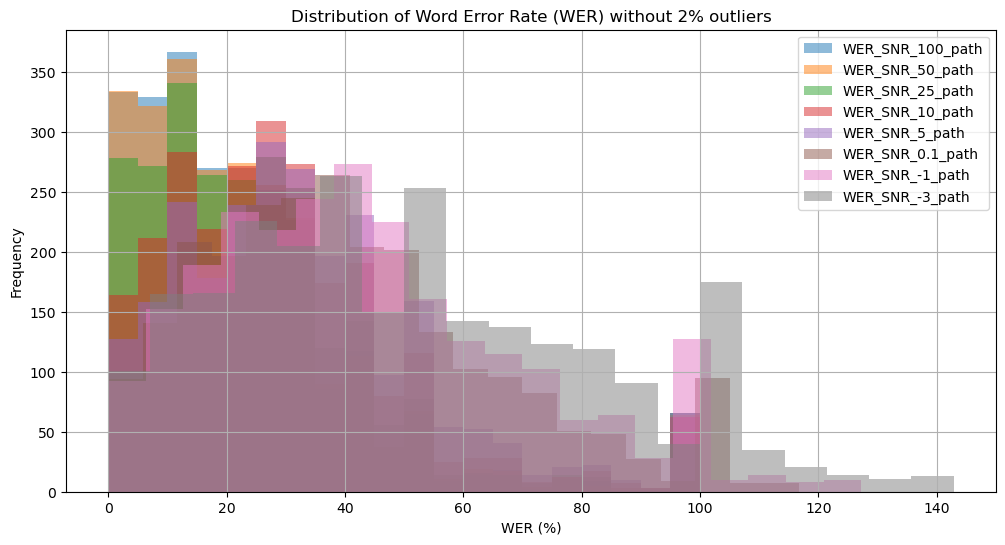

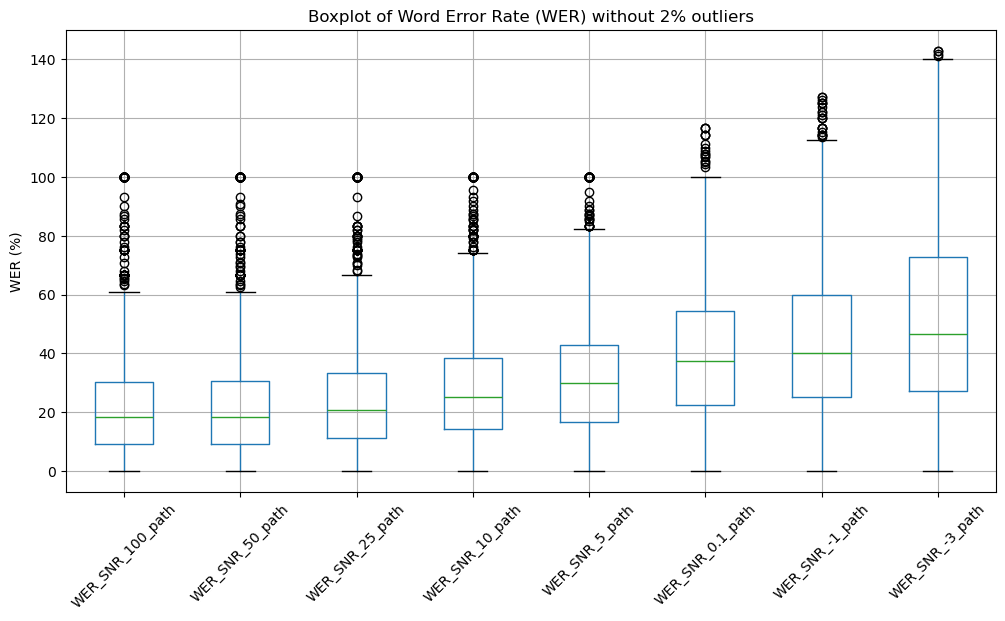

d:\Anaconda_3\envs\ASR_Techmo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda_3\envs\ASR_Techmo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda_3\envs\ASR_Techmo\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda_3\envs\ASR_Techmo\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

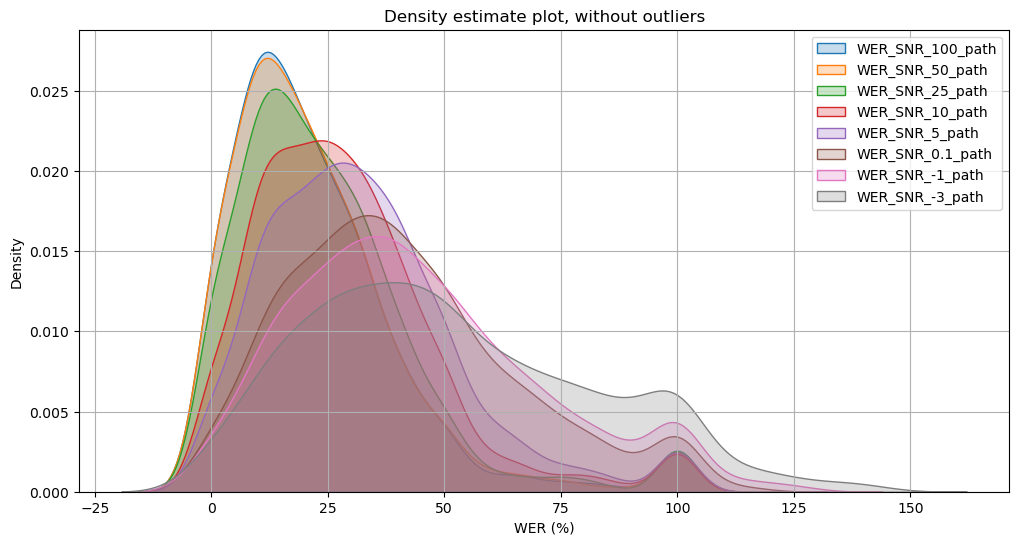

In [30]:
filtered_wer_values = df_whisper_large[wer_columns].apply(lambda x: x[(x >= x.quantile(0.02)) & (x <= x.quantile(0.98))])
histogram_plotting(filtered_wer_values,wer_columns,'Distribution of Word Error Rate (WER) without 2% outliers')
boxplot_plotting(filtered_wer_values,'Boxplot of Word Error Rate (WER) without 2% outliers')
kde_plotting(filtered_wer_values,wer_columns,'Density estimate plot, without outliers')

## Evaluating wav2wec

In [31]:
df_wav2wec = pd.read_parquet('./data/parquets/wav2wec_wer.parquet.gzip')

In [32]:
wav2wec_stats = advanced_statistics(df_wav2wec,'Wav2wec_SNR','sentences',2)
wav2wec_stats

,WER_SNR__100,WER_SNR__50,WER_SNR__25,WER_SNR__10,WER_SNR__5,WER_SNR__0.1,WER_SNR__-1
count,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00
mean,27.56,27.68,29.24,42.25,57.22,74.76,77.69
std,24.62,24.50,25.82,29.31,32.62,33.88,33.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,13.33,13.33,14.29,24.00,33.33,50.00,54.23
50%,23.33,23.33,25.00,38.46,55.56,83.33,89.04
75%,36.11,36.36,37.50,55.20,77.78,100.00,100.00
max,460.00,480.00,480.00,580.00,520.00,380.00,380.00
mean without 2%,25.48,25.65,27.06,40.36,54.97,74.06,77.22
Perfect outputs,179.00,179.00,158.00,90.00,59.00,38.00,33.00


In [33]:
for column in df_wav2wec.columns:
        if column.startswith('Wav2wec_SNR'):           
            stats = word_frequency(df_wav2wec,'sentences', column)
            print(f"Mostly missed word for {column}: {stats['mostly_missed_word']}")
            print(f"Mostly recognized word for {column}: {stats['mostly_recognized_word']}")

Mostly missed word for Wav2wec_SNR_100: .
Mostly recognized word for Wav2wec_SNR_100: i
Mostly missed word for Wav2wec_SNR_50: .
Mostly recognized word for Wav2wec_SNR_50: i
Mostly missed word for Wav2wec_SNR_25: .
Mostly recognized word for Wav2wec_SNR_25: i
Mostly missed word for Wav2wec_SNR_10: .
Mostly recognized word for Wav2wec_SNR_10: i
Mostly missed word for Wav2wec_SNR_5: w
Mostly recognized word for Wav2wec_SNR_5: i
Mostly missed word for Wav2wec_SNR_0.1: w
Mostly recognized word for Wav2wec_SNR_0.1: i
Mostly missed word for Wav2wec_SNR_-1: w
Mostly recognized word for Wav2wec_SNR_-1: i


In [7]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False)  
pd.set_option('display.precision', 4) 

# Group by noise_class and compute statistics for each group
wer_by_noise_class = df_wav2wec.groupby('noise_class')[wer_columns].describe()


print("\nWord Error Rate statistics by noise class:")
print(wer_by_noise_class)


Word Error Rate statistics by noise class:
                    WER_SNR_100                                                             WER_SNR_50                                                             WER_SNR_25                                                             WER_SNR_10                                                             WER_SNR_5                                                             WER_SNR_0.1                                                               WER_SNR_-1                                                               
                          count     mean      std  min      25%      50%      75%       max      count     mean      std  min      25%      50%      75%       max      count     mean      std  min      25%      50%      75%       max      count     mean      std  min      25%      50%      75%       max     count     mean      std  min      25%      50%      75%       max       count     mean      std   min      25%      50%     

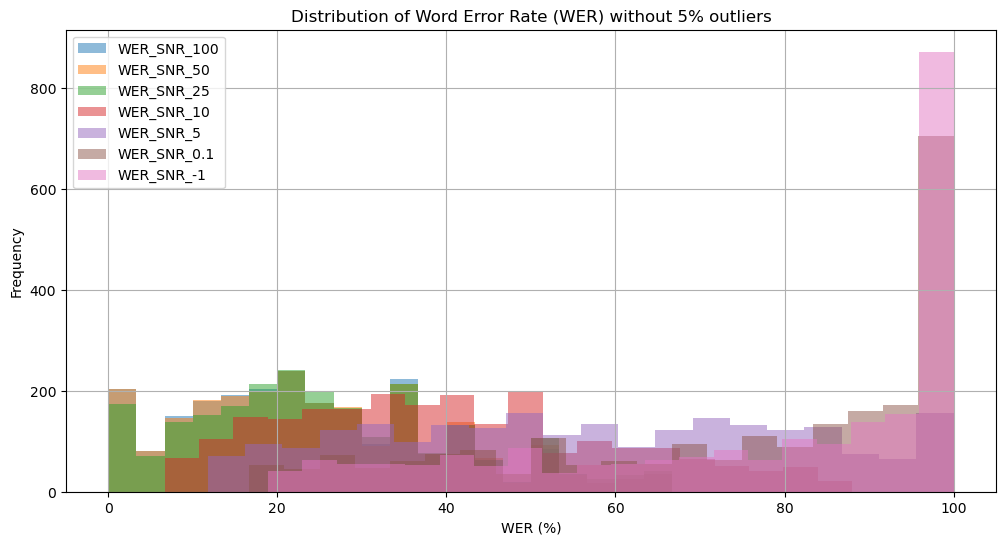

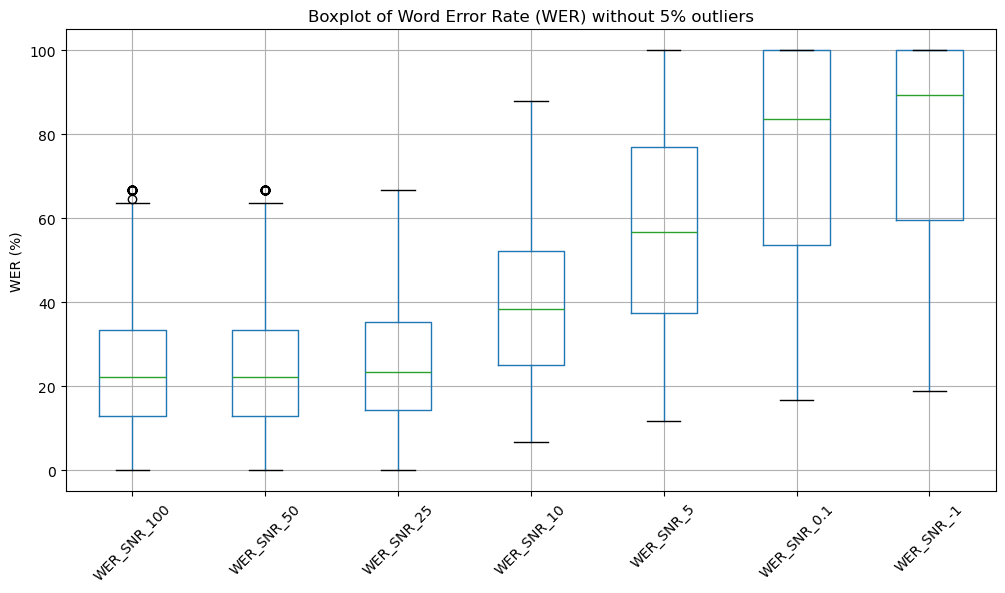

C:\Users\Eryk\AppData\Local\Temp\ipykernel_18008\2162775132.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_wer_values[column], label=column, shade=True)
c:\Users\Eryk\anaconda3\envs\Magisterka\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Eryk\AppData\Local\Temp\ipykernel_18008\2162775132.py:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_wer_values[column], label=column, shade=True)
c:\Users\Eryk\anaconda3\envs\Magisterka\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

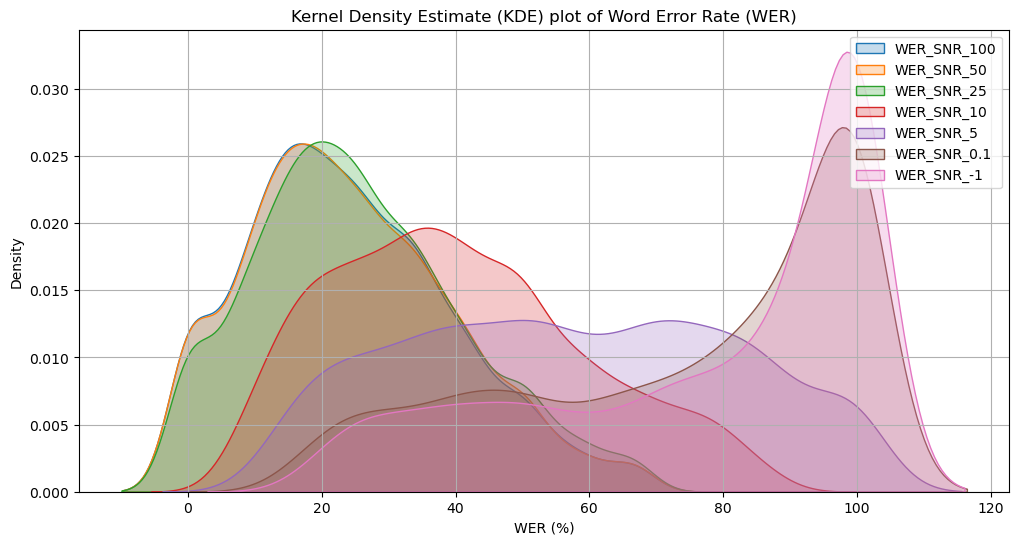

In [ ]:
# Filter WER values excluding the 5% lower and upper outliers
filtered_wer_values = df_wav2wec[wer_columns].apply(lambda x: x[(x >= x.quantile(0.02)) & (x <= x.quantile(0.98))])
histogram_plotting(filtered_wer_values,wer_columns,'Distribution of Word Error Rate (WER) without 2% outliers')
boxplot_plotting(filtered_wer_values,'Boxplot of Word Error Rate (WER) without 2% outliers')
kde_plotting(filtered_wer_values,'KDE plot without outliers')